## WQD7003 - DATA ANALYTICS
### FINAL EXAMINATION (Part 2)
### ACADEMIC SESSION 2021/2022: SEMESTER 2


#### Student Details: 

#### Student Name: Zhang Ziteng
#### Student Matric Number: s2149768


#### Questions Instructions: 
Lab Assessment based on Heart dataset. The dataset will be provided to the students.  You are required to write Python scripts in order to answer each of the questions. Your scripts should be written in  Jupyter notebook. The test duration is 1 hour and 15 minutes. (20 Marks)


#### Question 1
Create a data frame that contains all the data from Heart.csv                            (1 Mark)

In [1]:
import pandas as pd
df = pd.read_csv('Heart.csv')
# print(type(df))
df.head(3)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,9,4,3
1,0,0,0,0,25,1,0,0,1,7,6,1
2,0,1,1,1,28,0,0,0,0,9,4,8


#### Question 2
State the total number of smokers assuming 1-Smoker and 0-Non smoker. (2 Marks)


In [2]:
len(df.loc[df['Smoker'] == 1])

2240

#### Question 3
Normalize BMI values to a range of 0 to 1	(2 Marks)


In [4]:
import numpy as np
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

nor_bmi = NormalizeData(df['BMI'])
df['BMI'] = nor_bmi

print(df)

      HeartDiseaseorAttack  HighBP  HighChol  CholCheck       BMI  Smoker  \
0                        0       1         1          1  0.530612       1   
1                        0       0         0          0  0.224490       1   
2                        0       1         1          1  0.285714       0   
3                        0       1         0          1  0.265306       0   
4                        0       1         1          1  0.204082       0   
...                    ...     ...       ...        ...       ...     ...   
4995                     0       0         0          1  0.306122       0   
4996                     0       0         0          0  0.204082       0   
4997                     0       1         0          1  0.204082       1   
4998                     0       1         1          1  0.387755       1   
4999                     0       1         1          1  0.428571       0   

      Stroke  Diabetes  PhysActivity  Age  Education  Income  
0          0

#### Question 4
Create a line graph to view the BMI values
(3 marks)

<AxesSubplot:>

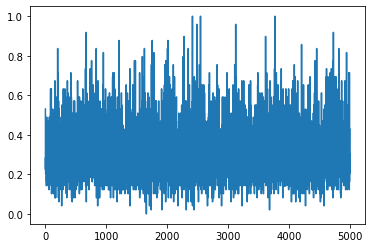

In [5]:
import matplotlib.pyplot as plt
df['BMI'].plot.line()

#### Question 5
Replace the following values of HeartDiseaseorAttack:
- 0-No heart Disease
- 1-With Heart Disease	            					 
                       (2 Marks)


In [6]:
# a = len(df[df['HeartDiseaseorAttack'] == 0])
# b = len(df[df['HeartDiseaseorAttack'] == 1])
# a,b

In [7]:
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].replace([0],'no')
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].replace([1],'yes')
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Age,Education,Income
0,no,1,1,1,0.530612,1,0,0,0,9,4,3
1,no,0,0,0,0.224490,1,0,0,1,7,6,1
2,no,1,1,1,0.285714,0,0,0,0,9,4,8
3,no,1,0,1,0.265306,0,0,0,1,11,3,6
4,no,1,1,1,0.204082,0,0,0,1,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,no,0,0,1,0.306122,0,0,0,1,7,6,8
4996,no,0,0,0,0.204082,0,0,0,1,3,4,8
4997,no,1,0,1,0.204082,1,0,0,1,13,6,7
4998,no,1,1,1,0.387755,1,0,2,1,12,6,8


In [8]:
# a = len(df[df['HeartDiseaseorAttack'] == 'no'])
# b = len(df[df['HeartDiseaseorAttack'] == 'yes'])
# a,b

#### Question 6
Do correlation analysis and perform dimensionality reduction accordingly. 
(Note: Your label is HeartDiseaseorAttack)						  (5 Marks)


In [9]:
# yes/no cant do correlation analysis with numbers
# so transfer yes/no to 1/0
cat_features = df.select_dtypes(include=['object']).columns.tolist()
df[cat_features] = df[cat_features].apply(lambda x: pd.factorize(x)[0])

In [10]:
df.head(3)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Age,Education,Income
0,0,1,1,1,0.530612,1,0,0,0,9,4,3
1,0,0,0,0,0.224490,1,0,0,1,7,6,1
2,0,1,1,1,0.285714,0,0,0,0,9,4,8


In [11]:
corr_matrix = df.corr()
print("Lable: Heart Diseaseor Attack corrlation")
corr_matrix["HeartDiseaseorAttack"].sort_values(ascending=False)

Lable: Heart Diseaseor Attack corrlation


HeartDiseaseorAttack    1.000000
Stroke                  0.236051
Age                     0.205558
HighChol                0.196005
HighBP                  0.188035
Diabetes                0.160559
Smoker                  0.090910
BMI                     0.065190
CholCheck               0.026850
Education              -0.071564
PhysActivity           -0.093499
Income                 -0.151755
Name: HeartDiseaseorAttack, dtype: float64

In [23]:
# According to High Correlation Filter algorithm, drop CholCheck,BMI,Education
df.drop(['CholCheck','BMI','Education','PhysActivity','Smoker','Income'],axis=1)
df.head(3)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Age,Education,Income
0,0,1,1,1,0.530612,1,0,0,0,9,4,3
1,0,0,0,0,0.224490,1,0,0,1,7,6,1
2,0,1,1,1,0.285714,0,0,0,0,9,4,8


#### Question 7 
You are required to create a prediction model to predict 'HeartDiseaseorAttack' based on GaussianNB model using the dataset that you have preprocessed until question 6. The training size is 80% and testing is 20%. Use split validation to validate your model.(5 marks)

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop(['HeartDiseaseorAttack'], axis=1)
y = df["HeartDiseaseorAttack"]
#print(f' X_shape: {X.shape} \n y_shape: {y.shape}')
#Xtrain, Xtest, ytrain, ytest = train_test_split(X_df, Y_df,random_state=123, test_size=0.2)
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,shuffle=True,random_state=0)
# from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=2, test_size=0.2)
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_train,y_train)
pred = model_gnb.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
#accuracy_score(ytest, y_model)
gnb = accuracy_score(y_test,pred)
acc = [gnb]
labels = ['GaussianNB']
accs = {'Accuracy': acc}
gnb_score = pd.DataFrame(accs,index=labels)
gnb_score

,Accuracy
GaussianNB,0.838


#### END 